In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [152]:
games = 2000
steps = 1000

In [179]:
def push_lever(mean_, std):
    return np.random.normal(mean_, std)

def calculate_expected_reward(mean_, std, g, i, Q_a):
    R = push_lever(mean_, std)
    Q_a[g, i, 0] += R
    Q_a[g, i, 1] += 1
    Q_a[g, i, 2] = Q_a[g, i, 0] / Q_a[g, i, 1]
    
    return R, Q_a

In [203]:
def epsilon_greedy(steps, epsilon, games=1):
    means = np.random.normal(0, 1, 10)
    print(f'Epsilon {epsilon}')
    R_t = np.zeros((games, steps))
    Q_a = np.zeros((games, steps, 3))
    for g in range(games):
        best = 0
        best_i = 0
        s = 0
        for i, mean_ in enumerate(means):
            R, Q_a = calculate_expected_reward(mean_, 1, g, i, Q_a)
            if Q_a[g, i, 2] > best:
                best = Q_a[g, i, 2]
                best_i = i
                
            s += R
            R_t[g, i] = s / (i + 1)
        
        for step in range(means.size, steps):
            pick_best = np.random.choice([True, False], p=[1 - epsilon, epsilon])
            if pick_best:
                R, Q_a = calculate_expected_reward(best, 1, g, best_i, Q_a)
            else:
                new_i = np.random.choice(np.arange(means.size))
                new = means[new_i]
                R, Q_a = calculate_expected_reward(new, 1, g, new_i, Q_a)
                if Q_a[g, i, 2] > best:
                    best = Q_a[g, i, 2]
                    best_i = new_i
            s += R
            if step == steps - 1:
                # print(f'{R}')
                pass
            R_t[g, step] = s / (step + 1)
    
    print('END')
    return R_t.mean(0)

Epsilon 0
END
Epsilon 0.01
END
Epsilon 0.1
END
Epsilon 1
END


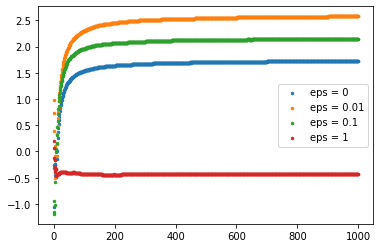

In [206]:
epsilons = [0, 0.01, 0.1, 1]
x = []

for i, e in enumerate(epsilons):
    x.append(epsilon_greedy(steps, e, games=100))
    plt.scatter(range(steps), x[i], label=f'eps = {e}', s=6)
plt.legend()